

# Project: TMDb - exploring genre, popularity, and the financials of movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This report will explore The Movie Database (TMDb) dataset. TMDb is a community built and curated movie and TV database. The dataset contains over 10,000 records of movies and accompanying descriptive information. Descriptive information includes genre, popularity, cast, director, production companies, budget, and revenue amongst others. This report will explore and analyse data associated with budget, revenue, popularity, runtime, and genre. A further variable of profitability will also be examined. The following research questions are posed:
>> 1. What are the relationships between these variables?
>> 2. What genres are the most popular?
>> 3. What genres are the most profitable?
>> 4. What genres command bigger budgets?
>> 5. Do better budget movies have higher profitability?
>> 6. Has the profitability of movies increased over time?

In [2]:
# Importing packages intend to use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> I'll start by loading the data, having a quick look at its general properties and then wrangling the data to clean it and get it into a workable format.
### General Properties

In [3]:
# Load data and print out a few line
df=pd.read_csv('tmdb-movies.csv')

# Looking at the shape of the data
df.shape


(10866, 21)

In [4]:
# Looking at how the data is presented - the first rows of the dataset
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# Looking at how the data is presented - the last rows of the dataset
df.tail(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [6]:
#Looking at the nature of the data in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> The above steps give us a quick sense of the size and nature of the dataset being explored. It's shape is 10,866 rows across 21 columns, with a mix of data types. A quick look at the head and tail of the dataset, give some early clues to the quality and comprehensiveness of the data. The popularity of the initial records (which seem to be ordered in order of descending popularity) is significantly higher than the fourth record and the 10,865th records. And there is missing budget and revenue data in the tail records. We also see the cast, production_companies, and genres can contain multiple data.  

### Data Cleaning

In [7]:
# Looking at the nature of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> There is a mix of data types in the dataset. Popularity is expressed as a float, as are budget_adj and revenue_adj, budget_adj. Budget and revenue however are both integers. Intuitively some of those data types expressed as objects make sense: title, cast, hompage, director, tagline, overview, genres, keywords would all be expected to contain text and appear as a string. In cleaning the data I wil do the following:
>1. Check the type for release date and see if it is in a date/time format. 
>2. I'll also change budget_adj and revenue_adj to integers in case I want to look these vis-a-vis revenue and budget.
>3. I'll drop the columns I'm not going to use to make the analysis easier to navigate
>4. I'll rename some columns for shorter syntax
>5. I'll check for null values, and remove as required
>6. I'll check for duplicates and remove any
>7. I'll check the number of records with a budget and revenue of 0, and clean

In [8]:
#check type of release date
type(df['release_date'][0])

str

In [9]:
#to change release date from string to a date
df['release_date']=pd.to_datetime(df['release_date'])
type(df['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
# convert budget_adj and revenue_adj to floats
df['budget_adj']=df['budget_adj'].astype(int)
type(df['budget_adj'][0])
df['revenue_adj']=df['revenue_adj'].astype(int)
type(df['revenue_adj'][0])

numpy.int64

In [11]:
#deleting columns I won't use: homepage, tagline, keywords, release date, imdb_id, production_companies
df.drop(['homepage', 'tagline','release_date','imdb_id','keywords','overview','homepage'],axis=1,inplace=True)

In [12]:
#use rename to change column names and check changes are applied
df.rename(columns={'original_title':'title','production_companies':'producers'}, inplace=True)
df.head(5)

,id,popularity,budget,revenue,title,cast,director,runtime,genres,producers,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137999939,348161292
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101199955,271619025
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183999919,1902723129
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,174799923,1385748801


In [13]:
#check for null values
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
title              0
cast              76
director          44
runtime            0
genres            23
producers       1030
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

We can see that cast, director, genres and producers all have null values. However as I'm only concerned with genres, those are the values that I'll delete.

In [16]:
df = df[df['genres'].notna()]

In [17]:
#to find duplicates
sum(df.duplicated())

1

That's great! There's only one duplicate which I'll remove.

In [20]:
df.drop_duplicates(inplace=True)

In [23]:
# check for budget with a zero value
df_budget=df.query('budget==0')
df_budget.shape

(5674, 15)

5764 budget records have 0. Its highly unlikely that a movie could be produced without a budget

In [25]:
# check for revenue with a zero value
df_budget=df.query('revenue==0')
df_budget.shape

(5993, 15)

5993 revenue records have 0 recorded. Whilst not unfeasible, its highly unlikely that a moview didn't make any revenue whatsoever. The absence of figures for budget and revenue are significant - individually nearly half the total records. In looking at how others approached this, some converted the zeros to null values. However I want to work with a set of data for which there are figures, and so I will delete those records with 0 budget or revenue

In [26]:
#shrinking data frame to only items with budget>0 and revenue>0
df = df[(df['budget'] > 0)]
df = df[(df['revenue'] > 0)]

In [27]:
# look at a summary of our cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3854 non-null   int64  
 1   popularity    3854 non-null   float64
 2   budget        3854 non-null   int64  
 3   revenue       3854 non-null   int64  
 4   title         3854 non-null   object 
 5   cast          3850 non-null   object 
 6   director      3853 non-null   object 
 7   runtime       3854 non-null   int64  
 8   genres        3854 non-null   object 
 9   producers     3808 non-null   object 
 10  vote_count    3854 non-null   int64  
 11  vote_average  3854 non-null   float64
 12  release_year  3854 non-null   int64  
 13  budget_adj    3854 non-null   int64  
 14  revenue_adj   3854 non-null   int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 481.8+ KB


I now have a smaller dataset to explore - 15 columns and 3854 rows

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What are the relationships between the variables I've chosen to look at?

I'm going to use scatterplots to show the relationships of variables for this question

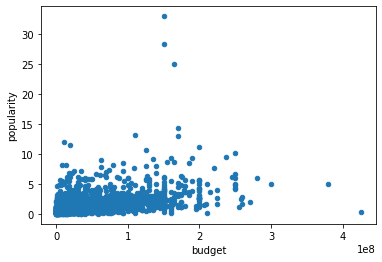

In [28]:
# scatterplot of budget and popularity
df.plot(x='budget', y='popularity', kind='scatter');

Budget and popularity seem to have a positive, although not strong relationship - popuarlity seems to increase with budget

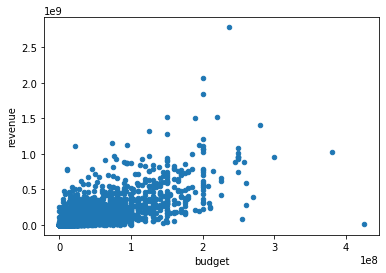

In [31]:
# scatterplot of budget and revenue
df.plot(x='budget', y='revenue', kind='scatter');

Budget and revenue seem to have a stronger, positive relationship

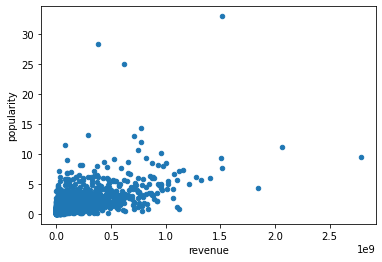

In [32]:
# scatterplot of popularity and revenue
df.plot(x='revenue', y='popularity', kind='scatter');

Revenue and popularity seem to have a positive, although not strong relationship

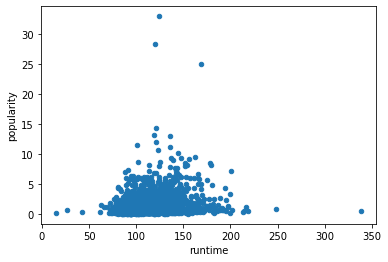

In [33]:
# scatterplot of popularity and runtime
df.plot(x='runtime', y='popularity', kind='scatter');

Looking at the relationship between runtime and popularity, the results approximate a distribution rather than a linear relationship. It looks like popularity could be optimised by runtime.

Budget and revenue seem to show a positive relationship with popularity; as they increase so does popularity. But the slope of relationship suggest an x unit increase in budget or revenue may not produce a comparative quantum increase in popularity. This would be an area for further exploration. Moreover there are a number of outliers. Removing - or ignoring - those outliers would provide a clearer picture of the relationships. Finally looking at the relationship between runtime and popularity, the results approximate a distribution rather than a linear relationship. It looks like popularity could be optimised by runtime. Again it seems that the application of statistics would help understand this further.

### Research Question 2: What genre is the most popular?

In [34]:
# To start I'm going to create a new data frame for genre analysis
df_genre=df.copy()
mov_titl = df_genre[['genres','id','title','popularity','budget','revenue','cast','director','runtime','producers','vote_count','vote_average','release_year', 'budget_adj', 'revenue_adj']]
mov_titl.head(4)

,genres,id,title,popularity,budget,revenue,cast,director,runtime,producers,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Action|Adventure|Science Fiction|Thriller,135397,Jurassic World,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892
1,Action|Adventure|Science Fiction|Thriller,76341,Mad Max: Fury Road,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137999939,348161292
2,Adventure|Science Fiction|Thriller,262500,Insurgent,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101199955,271619025
3,Action|Adventure|Science Fiction|Fantasy,140607,Star Wars: The Force Awakens,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183999919,1902723129


In [35]:
# split the genres column for analysis so that records with multiple genres reflect an individual record for each genre type
sub_gen = mov_titl['genres'].str.split('|').apply(pd.Series, 1).stack()
sub_gen.index = sub_gen.index.droplevel(-1)
sub_gen.name = 'genre'
df_genre = mov_titl.join(sub_gen)
mov_titl=df_genre[['id','title','genre','popularity','budget','revenue','cast','director','runtime','producers','vote_count','vote_average','release_year', 'budget_adj', 'revenue_adj']]
mov_titl.head(4)

,id,title,genre,popularity,budget,revenue,cast,director,runtime,producers,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,Jurassic World,Action,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892
0,135397,Jurassic World,Adventure,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892
0,135397,Jurassic World,Science Fiction,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892
0,135397,Jurassic World,Thriller,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892


Technically I should have bundled this under data cleaning, but we can now see that movies with multiple genre categorisations feature a record for each genre.

Text(0, 0.5, 'Popularity')

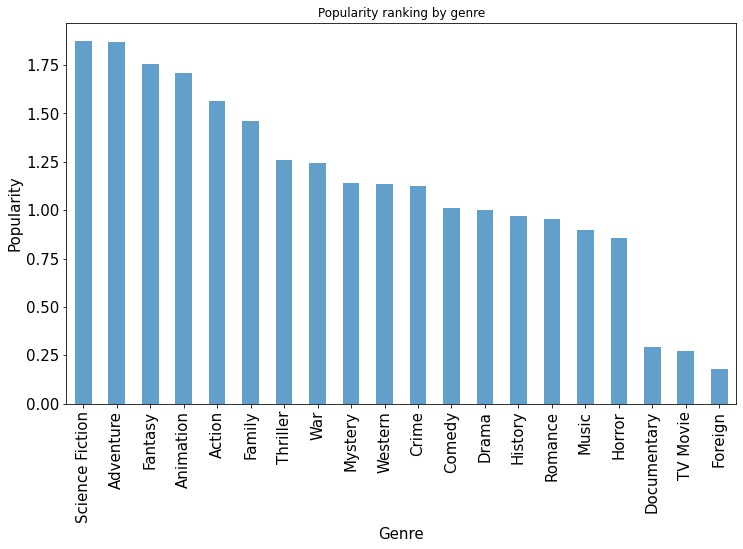

In [36]:
#plot the mean popularity for each genre
popular=mov_titl.groupby('genre')['popularity'].mean().sort_values(ascending=False)
popular.plot(kind='bar',title='Popularity ranking by genre', alpha=0.7, figsize=(12,7), fontsize=15)
plt.xlabel('Genre',fontsize=15)
plt.ylabel('Popularity',fontsize=15)

Science fiction and adventure movies appear the most popular, whilst documentaries, made-for-TV movies, and foreign film are the most popular

### Research Question 3: What genre is the most profitable?

In [41]:
# Calculate profitability by setting up a new column that contains the difference between revenue and budget
mov_titl['profit'] = mov_titl['revenue'] - mov_titl['budget']

Text(0, 0.5, 'Profitability')

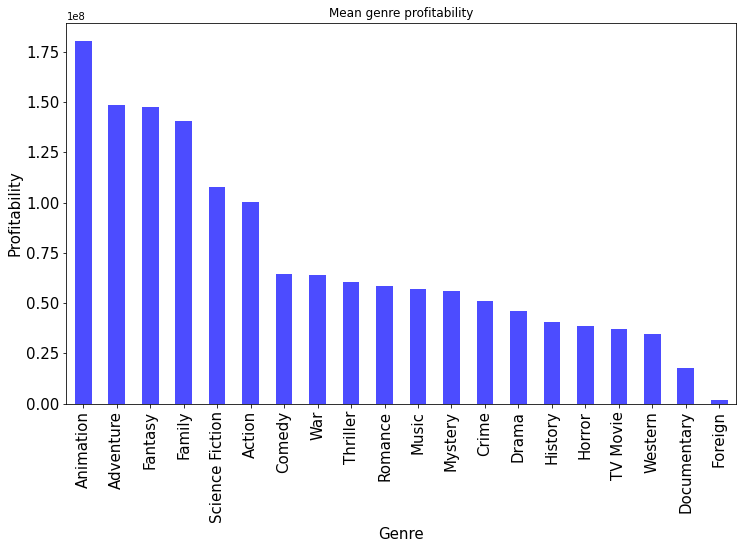

In [46]:
# Plot mean profitability for genres
popular=mov_titl.groupby('genre')['profit'].mean().sort_values(ascending=False)
popular.plot(kind='bar',title='Mean genre profitability', alpha=0.7, figsize=(12,7), color=('blue'), fontsize=15)
plt.xlabel('Genre',fontsize=15)
plt.ylabel('Profitability',fontsize=15)

Animation appears the most profitable genre of movie; with documentaries and foreign movies the least. I wonder whether it is revenue or budget that drives that?

Text(0, 0.5, 'Revenue')

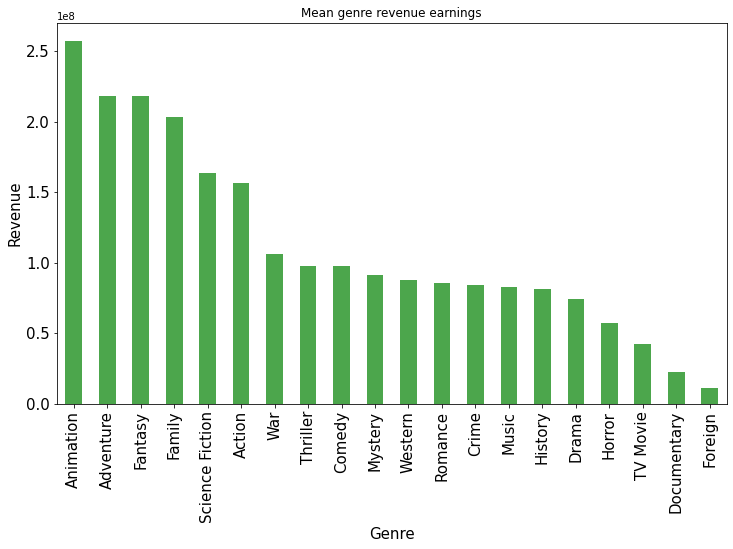

In [47]:
# Plot mean revenue takings for genres
popular=mov_titl.groupby('genre')['revenue'].mean().sort_values(ascending=False)
popular.plot(kind='bar',title='Mean genre revenue earnings', alpha=0.7, figsize=(12,7), color=('green'), fontsize=15)
plt.xlabel('Genre',fontsize=15)
plt.ylabel('Revenue',fontsize=15)

Text(0, 0.5, 'Budget')

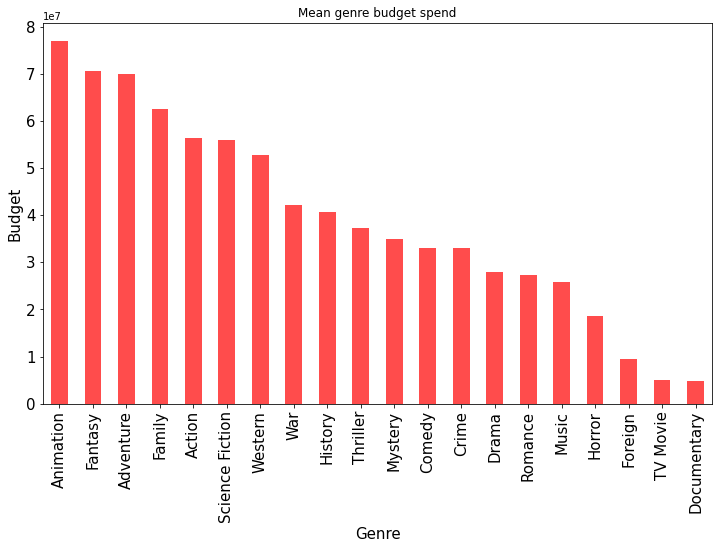

In [48]:
# Plot mean budget expense for genres
popular=mov_titl.groupby('genre')['budget'].mean().sort_values(ascending=False)
popular.plot(kind='bar',title='Mean genre budget spend', alpha=0.7, figsize=(12,7), color=('red'), fontsize=15)
plt.xlabel('Genre',fontsize=15)
plt.ylabel('Budget',fontsize=15)

So animation spends the most but also brings in the most revenue, and the resultant margin is the highest. Interestingly it looks like the music genre could be a good investment - they rank the 5th lowest in budget, 14th in average revenue earned, and 11th in profitability. Further work could be done here to understand the profit margins as a percentage per category.

### Research Question 4: What genres command the biggest budget?

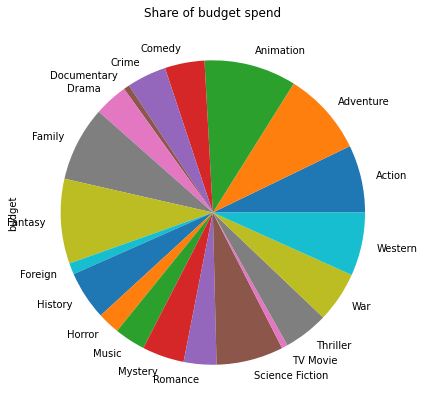

In [50]:
spend=mov_titl.groupby('genre')['budget'].mean();
spend.plot(kind='pie', figsize=(12,7), title='Share of budget spend')

This is not as elegant as the bar graph in the previous question, but animation, adventure, and fantasy genres are all big spenders.

### Research Question 5: Do better budget movies have higher profitability?

Text(0.5, 1.0, 'Budget to popularity')

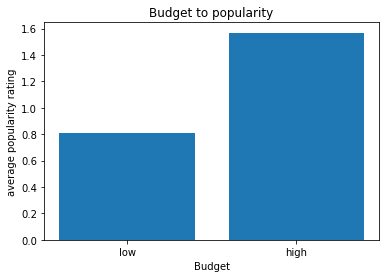

In [51]:
# Find the median budget and then create data frames for the mean amounts above and below that
median=df['budget'].median() 
low=df.query('budget <24000000')
high=df.query('budget>=24000000')
low_budg=low['popularity'].mean()
high_budg=high['popularity'].mean()

# plot the outcomes
locations=[1,2]
heights=[low_budg,high_budg]
labels=['low', 'high']
plt.bar(locations, heights, tick_label=labels)
plt.xlabel('Budget')
plt.ylabel('average popularity rating')
plt.title('Budget to popularity')

Movies with higher budgets appear to be more popular. That's perhaps not unsurprising: bigger budgets could buy bigger star power and technical investments such as special effects which one might expect to have a bearing on popularity

### Research Question 6: Has the profitability of movies increased over time?

Text(0.5, 1.0, 'Profit through the decades')

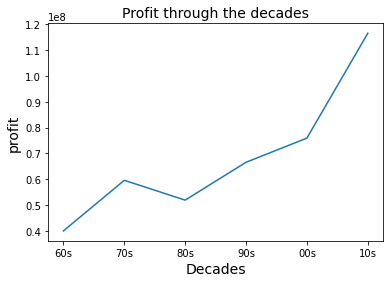

In [54]:
#here I have created a new column with the decades
bin_edges=[1960,1970,1980,1990,2000,2010,2015]
bin_names=['60s','70s','80s','90s','00s','10s']
mov_titl['decades']=pd.cut(mov_titl['release_year'],bin_edges,labels=bin_names)

#plot profit over time
spend=mov_titl.groupby('decades')['profit'].mean();
plt.plot(spend)
plt.xlabel('Decades',size=14)
plt.ylabel('profit',size=14);
plt.title('Profit through the decades',size=14)

Movies appear to have increased in popularity; especially in the last twenty years. A further area of exploration could be to examine for example, how animation's profitability has improved over time

<a id='conclusions'></a>
## Conclusions

> On the face of it, revenue generated by movies appears to have a relationship with the budget behind it. Similarly the popularity of movies appears to have a relationship with the spend behind it. Animation movies appear to be the most profitable and earn the most revenue, but also appear to the be most costly to produce. And the profitability of movies seems to have improved over time; significantly it would seem in the last twenty years. However there are limitations to this anaysis:

>> 1. The data clearly contains outliers - some quite significant - which may skew the results. Further cleaning of the data would be necessary.
>>2. The dataset is one that is community-curated. Which means that there are multiple users entering data. It is not known what TMDb's data cleaning protocols are; how user submitted data is checked and so it is possible that there may be inaccuracies in the data itself.
>>3. The dataset is one that is community-curated. If popularity is a function of who logs on to the site and votes, then popularity can't be taken as representative of everyone. Similarly what I like as a user may be different to what you like as a user, and so popularity is subjective.
>>4. Finally we don't know the demographics of the community curating and using TMDb. Could one expect for example, if the majority of users/the community were from West Africa or Nigeria (the home of Nollywood) or India (the home of Bollywood) could one expect the same popularity ratings.
>>5. We don't know whether 10,866 represents every single (assuming commercial) movie ever made and therefore whether it is representative of the whole poulation.
>>6. Could there potentially be a recency effect? For example, Jurrasic World has a very high rating, and was recently released, compared to say an early Charlie Chaplin film. So could popularity be shaped by what people know and is top of mind.


### References

I drew on the following references to help with code in specific places:
> how to drop values only in a particular column:
> https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan 
https://stackoverflow.com/questions/49841989/python-drop-value-0-row-in-specific-columns
> to help with genres: 
>https://www.kaggle.com/abhishekchhibber/imdb-analysis-by-genres
> to help with profit over time:
> https://static1.squarespace.com/static/55bfa8e4e4b007976149574e/t/5b998f398a922d8eaecaefd2/1536790332004/investigate-dataset-movies.pdf

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0